<a href="https://colab.research.google.com/github/dsnnaveen/Online-Retail-Customer-Segementaion/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset

In [3]:
df=pd.read_excel('/content/drive/MyDrive/AB Capstone Projects data files/UNSUPERVISED LEARNING/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

Expolratory data analysis

In [6]:
#Check for missing values in the dataset
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# to remove the null values present in customer id
df = df[pd.notnull(df['CustomerID'])]

In [9]:
df = df[pd.notnull(df['Description'])]

In [10]:
df.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
print("Duplicate transactions : {}".format(df.duplicated().sum()))

Duplicate transactions : 5225


In [13]:
# First five duplicate transactions
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [14]:
# Remove duplicates
df = df.drop(index=df[df.duplicated()].index)
print("Retail transactions after duplicates removal : {}".format(df.shape[0]))

Retail transactions after duplicates removal : 401604


In [15]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [16]:
df=df[~df['InvoiceNo'].str.contains('C')]

In [17]:
df.shape

(392732, 8)

In [18]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [20]:
# Descriptive statistics for StockCode.
df['StockCode'].describe()

count     392732
unique      3665
top       85123A
freq        2023
Name: StockCode, dtype: object

There are 3665 unique prodict codes. '85123A' is the most common product code appeared 2023 times.

In [21]:
Stkc_df=df['StockCode'].value_counts().reset_index()
Stkc_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
Stkc_df.rename(columns={'StockCode': 'Count'}, inplace=True)
Stkc_df.head()

,StockCode_Name,Count
0,85123A,2023
1,22423,1714
2,85099B,1615
3,84879,1395
4,47566,1390


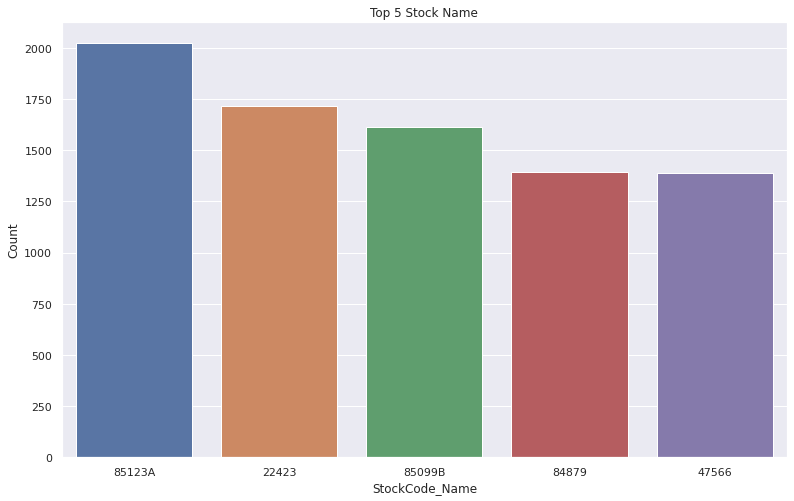

In [22]:

plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stkc_df[:5])

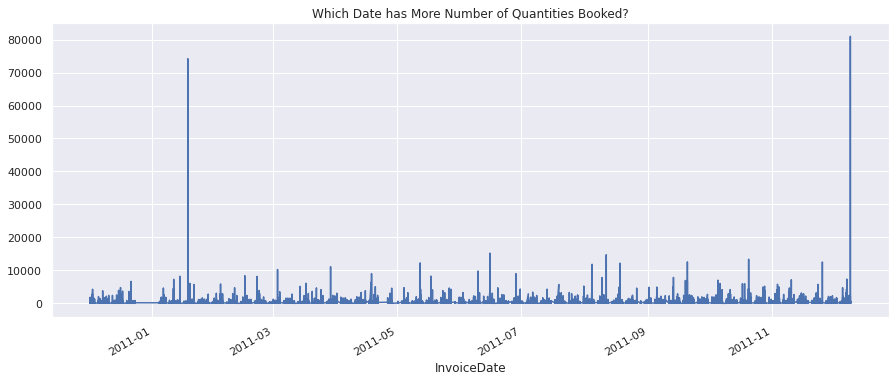

In [23]:

df.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize=(15,6))
plt.title('Which Date has More Number of Quantities Booked?')
plt.show()

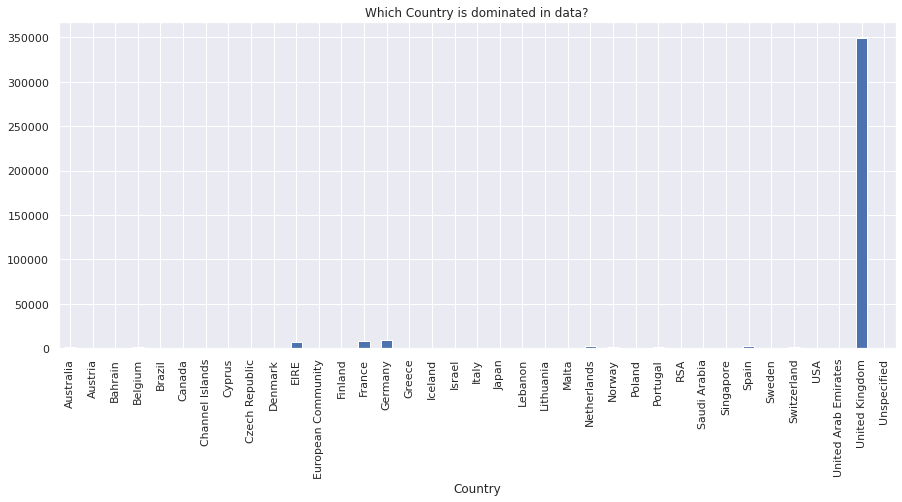

In [24]:
df.groupby('Country').count()['CustomerID'].plot.bar(figsize=(15,6))
plt.title('Which Country is dominated in data?')
plt.show()

In [25]:

#Keep only United Kingdom data
df = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [26]:
# Descriptive statistics for Quantity.
df['Quantity'].describe()

count    349227.000000
mean         12.181295
std         191.797470
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [27]:
#Validate if there are any negative values in Quantity column
df.Quantity.min()

1

In [28]:
# Descriptive statistics for UnitPrice
df['UnitPrice'].describe()

count    349227.000000
mean          2.972124
std          17.990307
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [29]:
#Convert the string date field to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [30]:
#Add new column depicting total amount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [31]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
df.shape

(349227, 9)

In [32]:
import datetime as dt

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


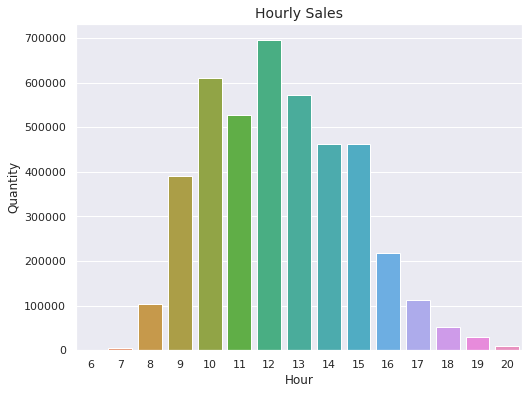

In [33]:
hourly_sales = df[['Hour', 'Quantity']].groupby('Hour').sum()
plt.figure(figsize=(8,6))
plt.title("Hourly Sales", fontsize=14)
sns.barplot(hourly_sales.index, hourly_sales['Quantity'])

The majority of the sales happens in between 10am to 3pm

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


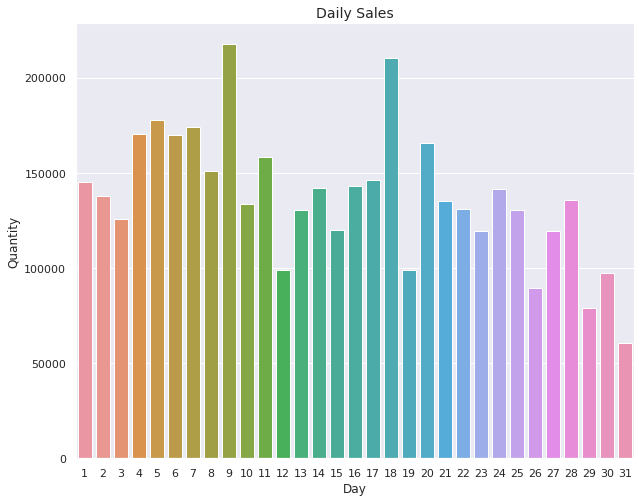

In [34]:
daily_sales = df[['Day', 'Quantity']].groupby('Day').sum()
plt.figure(figsize=(10,8))
plt.title("Daily Sales", fontsize=14)
sns.barplot(daily_sales.index, daily_sales['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


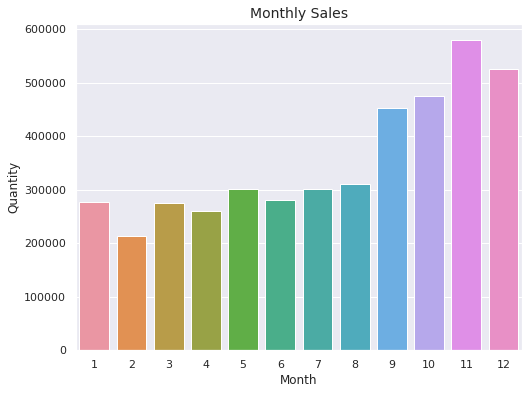

In [35]:
monthly_sales = df[['Month', 'Quantity']].groupby('Month').sum()
plt.figure(figsize=(8,6))
plt.title("Monthly Sales", fontsize=14)
sns.barplot(monthly_sales.index, monthly_sales['Quantity'])

Most of the sales happened in between September and December month.

#3. Customer RFM (Recency, Frequency, Monetary) analysis




What is RFM technique ?

RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency : How much time has elapsed since a customer's last activity or transaction with the brand?

Frequency : How often has a customer transacted or interacted with the brand during a particular period of time?

Monetary : How much a customer has spent with the brand during a particular period of time?

In [36]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [37]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


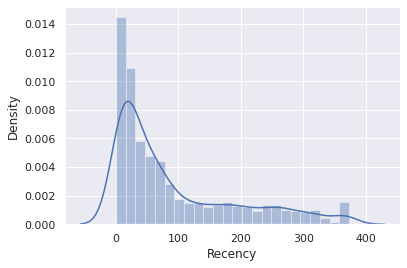

In [38]:
#Recency distribution plot

x = RFMScores['Recency']

ax = sns.distplot(x)
plt.show()

In [39]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    3921.000000
mean       89.065800
std       214.022733
min         1.000000
25%        17.000000
50%        40.000000
75%        98.000000
max      7676.000000
Name: Frequency, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


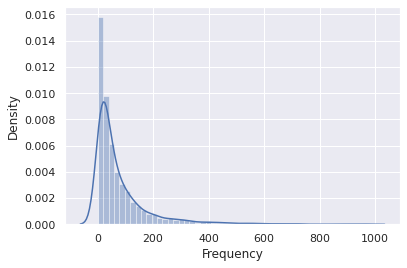

In [40]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)


In [43]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      3921.000000
mean       1857.950687
std        7477.736186
min           0.000000
25%         298.110000
50%         644.300000
75%        1570.810000
max      259657.300000
Name: Monetary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


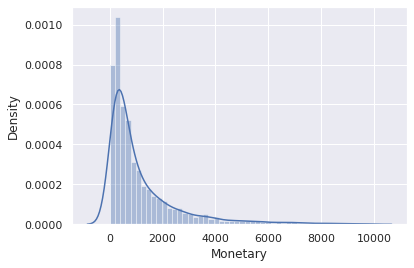

In [44]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [45]:
# Group Recency by customer id
max_date = df['InvoiceDate'].max()
# Calculate days passed since customer's last purchase.
df['Days_passed'] = max_date -  df['InvoiceDate']
df['Days_passed'] = df['Days_passed'].dt.days
# Group Recency by customer id
recency = df[['CustomerID', 'Days_passed']].groupby('CustomerID').min()
recency.head(5)

,Days_passed
CustomerID,
12346.0,325
12747.0,1
12748.0,0
12749.0,3
12820.0,2


In [46]:
# Frequency of the customer transactions
frequency = df[['CustomerID','InvoiceNo']].groupby('CustomerID').count()
frequency.head()

,InvoiceNo
CustomerID,
12346.0,1
12747.0,103
12748.0,4413
12749.0,199
12820.0,59


In [47]:
# Monetory -> purchasing power of the customer
df['SaleAmount'] = df['Quantity'] * df['UnitPrice']
monetory = df[['CustomerID', 'SaleAmount']].groupby('CustomerID').sum()
monetory.head()

,SaleAmount
CustomerID,
12346.0,77183.60
12747.0,4196.01
12748.0,33053.19
12749.0,4090.88
12820.0,942.34


In [48]:
# Merge recency, frequency and monetory dataframes

RFM = recency.merge(frequency,on='CustomerID').merge(monetory, on='CustomerID')
RFM = RFM.rename(columns={"Days_passed": "Recency", "InvoiceNo": "Frequency", "SaleAmount" : "Monetory"})
RFM.head()

,Recency,Frequency,Monetory
CustomerID,,,
12346.0,325,1,77183.60
12747.0,1,103,4196.01
12748.0,0,4413,33053.19
12749.0,3,199,4090.88
12820.0,2,59,942.34


In [49]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


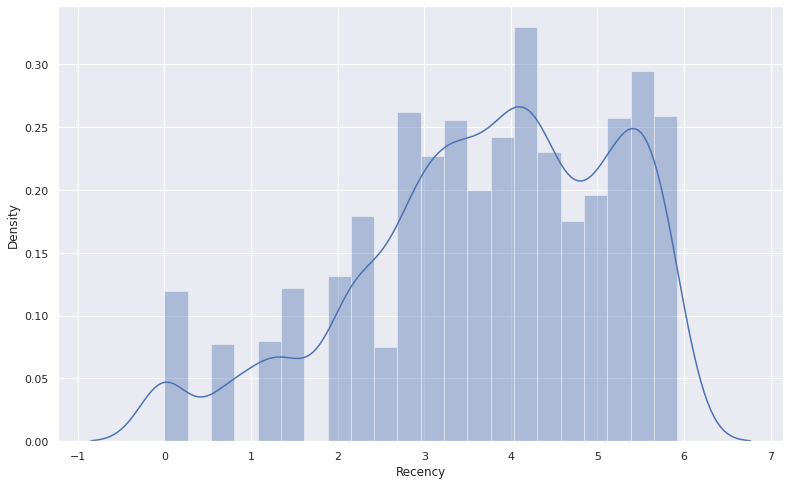

In [50]:

#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


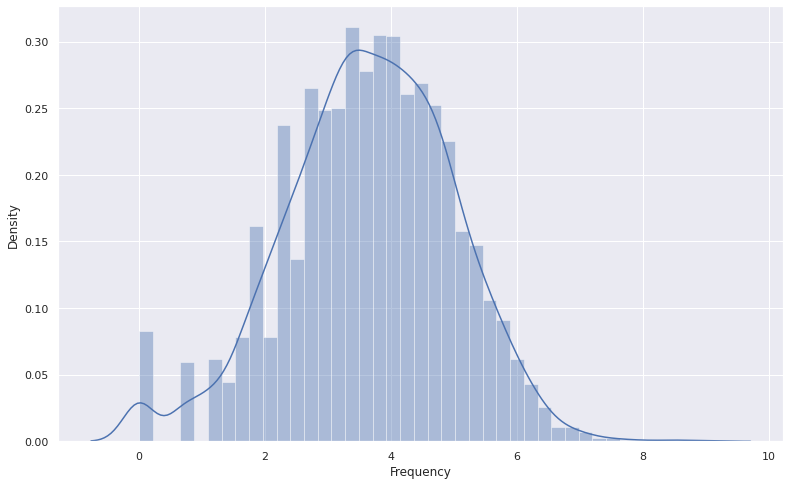

In [51]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


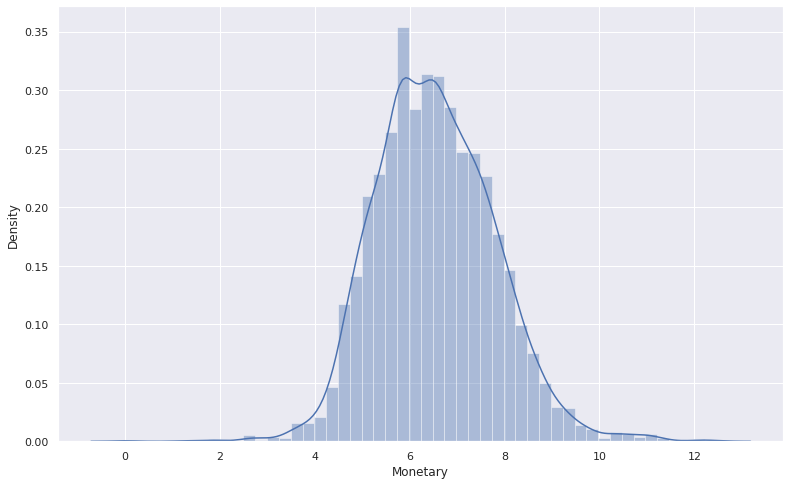

In [52]:

#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)


# 4. KMeans clustering

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=5)
    cluster_labels = clusterer.fit_predict(RFM)
    
    silhouette_avg = silhouette_score(RFM, cluster_labels)
    print("for n_clusters =", n_clusters, "Average Silhouette score = ", silhouette_avg)

for n_clusters = 2 Average Silhouette score =  0.9746329235684965
for n_clusters = 3 Average Silhouette score =  0.9575878188632511
for n_clusters = 4 Average Silhouette score =  0.8389847436161912
for n_clusters = 5 Average Silhouette score =  0.8093961802939781
for n_clusters = 6 Average Silhouette score =  0.8083539897612614
for n_clusters = 7 Average Silhouette score =  0.7279724031340576
for n_clusters = 8 Average Silhouette score =  0.7244211138527672


In [54]:
# Kmeans with number of clusers = 4
clusterer = KMeans(n_clusters=4, random_state=5)
cluster_labels = clusterer.fit_predict(RFM)

In [55]:

RFM['Cluster'] = cluster_labels
RFM.groupby('Cluster').mean()

,Recency,Frequency,Monetory
Cluster,,,
0,95.081023,69.105518,998.859659
1,2.333333,256.666667,207506.863333
2,37.695652,1199.608696,52660.498696
3,19.166667,356.327778,9669.716389


Cluster 0 contains group of customers with low value of Recency, Frequency and Monetory

Cluster 1 contains group of customers with high Monetory value

Cluster 2 contains group of customers with high Frequnecy and monetary value

Cluster 3 contains group of customers with moderate value of Recency, Frequnecy and Monetory

# 5. Principal component analysis (PCA)

In [56]:
from sklearn.pipeline import make_pipeline

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=43))
RFM_transformed = pca.fit_transform(RFM)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Clusters')

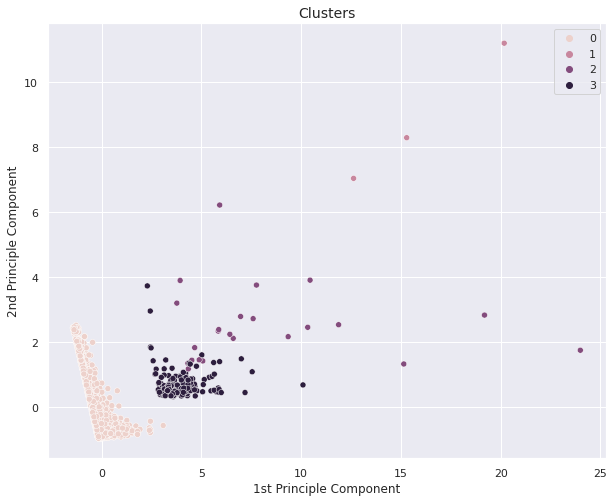

In [57]:
plt.figure(figsize=(10,8))
sns.scatterplot(RFM_transformed[:,0], RFM_transformed[:,1], hue=cluster_labels)
plt.xlabel('1st Principle Component')
plt.ylabel('2nd Principle Component')
plt.title("Clusters", fontsize=14)

#6. CONCLUSION


In this case, we have compared RFM Analysis with Kmeans clustering. How much best cluster making in modeling with Kmeans. Firsty,this data set is better with scaling and centering data, robust scaler should be using in this dataset because so many outliers in our data. After that, we have find out best n_cluster for this data to build how much segmentation should be given and show best silhoutte score for each n_cluster. And in the final we have done PCA(Principal component analysis) to find best components.
